In [1]:
import torch 
from utils import * 
from Kalman import *
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
d = 3
m = 8
SNR = 20
array = ArrayModel(m)

T = 40
Ts = 1.0
Ns = 100
time = torch.arange(0, T, Ts/Ns)

v1 = 1500
x1 = -27000 + time * v1
y1 = torch.Tensor([27000])
theta1 = torch.atan2(x1, y1) 

v2 = 0
x2 = 0 + time * v2
y2 = torch.Tensor([20000])
theta2 = torch.atan2(x2, y2) 

v3 = -1500
x3 = 32000 + time * v3
y3 = torch.Tensor([30000])
theta3 = torch.atan2(x3, y3)

thetas = torch.stack((theta1, theta2, theta3), dim=1)
received_signal = generate_signal(thetas=thetas, array=array, SNR=SNR)

In [3]:
W = torch.Tensor([[[Ts ** 3 / 3, Ts ** 2 / 2],
                   [Ts ** 2 / 2, Ts]]]).repeat(d, 1, 1) * (torch.pi * 1 / 180) ** 2
V = torch.ones(d) * (torch.pi * 5 / 180) ** 2

track = Kalman(array=array, d=d, Ts=Ts, W=W, V=V)
theta_0, theta_1 = track.initialize(received_signal[:2*Ns])
results = [theta_0, theta_1]

for i in range(2, int(T/Ts)):
    chunk = received_signal[Ns*i:Ns*(i+1)]
    est_theta_i = track.estimate(chunk, modified=True)
    results.append(est_theta_i)

results = torch.stack(results, dim=0)
time_decimated = torch.arange(Ts, T+Ts, Ts)

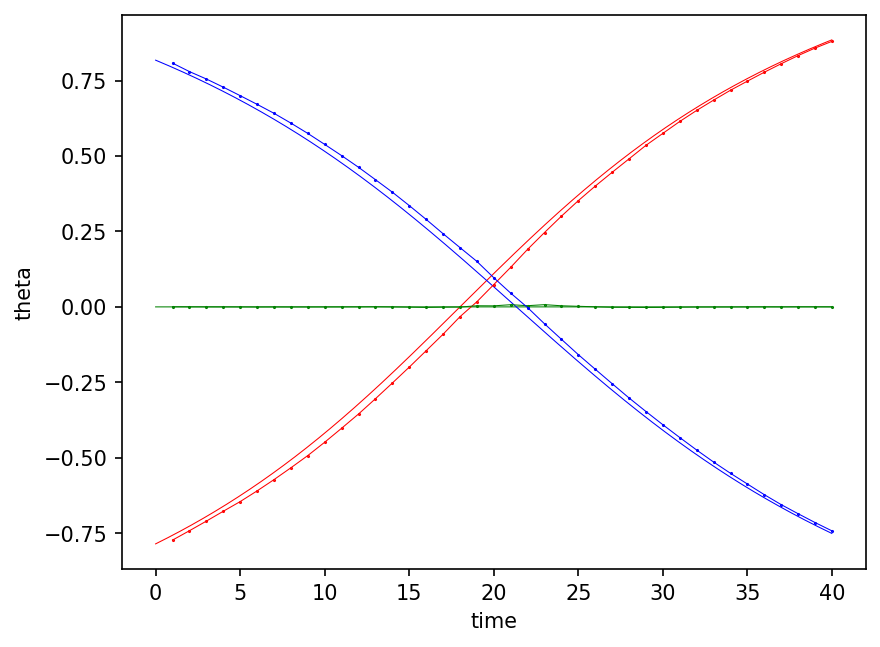

In [4]:
plt.plot(time, theta1, color='red', linewidth=0.5)
plt.plot(time, theta2, color='green', linewidth=0.5)
plt.plot(time, theta3, color='blue', linewidth=0.5)
plt.plot(time_decimated, results[:, 0], color='red', marker='.', linewidth=0.5, markersize=1.0)
plt.plot(time_decimated, results[:, 1], color='green', marker='.', linewidth=0.5, markersize=1.0)
plt.plot(time_decimated, results[:, 2], color='blue', marker='.', linewidth=0.5, markersize=1.0)
plt.xlabel('time')
plt.ylabel('theta')
plt.show()